In [3]:
#### E-commerce customer behavior
# Import libararies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## Reading the dataset
df = pd.read_csv('E-commerce Customer Behavior - Sheet1.csv')

In [6]:
# Exploring the data
df.shape

(350, 11)

In [7]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [8]:
df.tail()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
345,446,Male,32,Miami,Silver,660.30,10,3.8,True,42,Unsatisfied
346,447,Female,36,Houston,Bronze,470.50,8,3.0,False,27,Neutral
347,448,Female,30,New York,Gold,1190.80,16,4.5,True,28,Satisfied
348,449,Male,34,Los Angeles,Silver,780.20,11,4.2,False,21,Neutral
349,450,Female,43,Chicago,Bronze,515.75,10,3.3,True,49,Unsatisfied


In [11]:
# Provides concise data of data frame
# Helps understand the structure of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [13]:
# Check for the missing values in a data frame
# Helps to clean the data
df.isnull().sum()

Customer ID                 0
Gender                      0
Age                         0
City                        0
Membership Type             0
Total Spend                 0
Items Purchased             0
Average Rating              0
Discount Applied            0
Days Since Last Purchase    0
Satisfaction Level          2
dtype: int64

In [16]:
# used to identify and count the duplicate rows in a column
df.duplicated().sum()

np.int64(0)

In [18]:
# Providing the statistical summary of the numeric columns in a DataFrame
df.describe()

,Customer ID,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase
count,350.000000,350.000000,350.000000,350.000000,350.000000,350.000000
mean,275.500000,33.597143,845.381714,12.600000,4.019143,26.588571
std,101.180532,4.870882,362.058695,4.155984,0.580539,13.440813
min,101.000000,26.000000,410.800000,7.000000,3.000000,9.000000
25%,188.250000,30.000000,502.000000,9.000000,3.500000,15.000000
50%,275.500000,32.500000,775.200000,12.000000,4.100000,23.000000
75%,362.750000,37.000000,1160.600000,15.000000,4.500000,38.000000
max,450.000000,43.000000,1520.100000,21.000000,4.900000,63.000000


In [20]:
# Cleaning the data
# Removing NaNs etc
df.dropna(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [22]:
## Analysis and visualization
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [24]:
# Used to count the occurrences of each unique value value in the gender column
Gender = df['Gender'].value_counts().reset_index()
Gender

,Gender,count
0,Male,175
1,Female,173


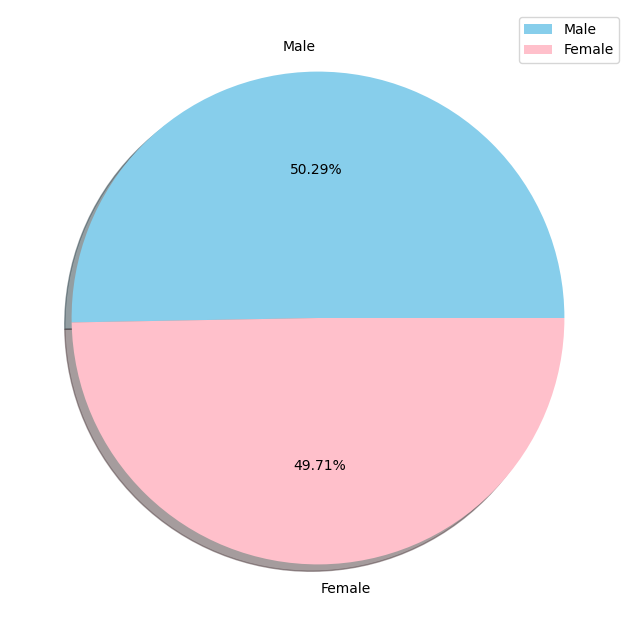

In [25]:
plt.figure(figsize=(8,8))
plt.pie(Gender['count'], colors=['skyblue', 'pink'],
        shadow=True, labels=Gender['Gender'],
        autopct='%1.2f%%'
       )
plt.legend()
plt.show()

In [26]:
GenderwithAge = df.groupby('Gender')['Age'].value_counts().reset_index()
GenderwithAge

,Gender,Age,count
0,Female,43,25
1,Female,30,24
2,Female,31,24
3,Female,36,24
4,Female,41,24
5,Female,37,22
6,Female,32,9
7,Female,38,9
8,Female,42,9
9,Female,29,2


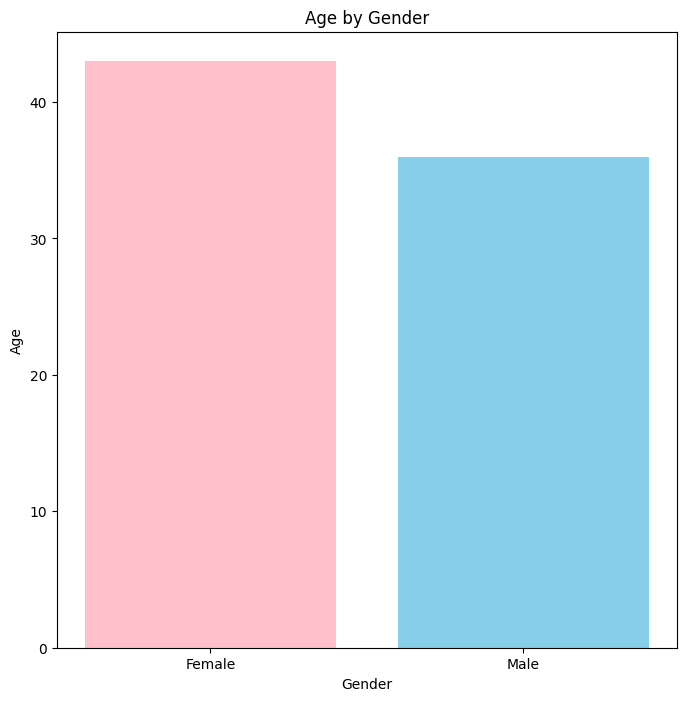

In [27]:
plt.figure(figsize=(8,8))
plt.bar(GenderwithAge['Gender'], GenderwithAge['Age'],
        color=['pink', 'skyblue'],
       )
plt.xlabel('Gender')
plt.ylabel('Age')
plt.title('Age by Gender')
plt.show()

In [28]:
# perform a specific analysis on their dataframe count the coddurecses
GenderWithMembershiptype = df[["Gender", "Membership Type"]].value_counts().reset_index()
GenderWithMembershiptype

,Gender,Membership Type,count
0,Male,Silver,116
1,Female,Bronze,114
2,Male,Gold,59
3,Female,Gold,58
4,Female,Silver,1


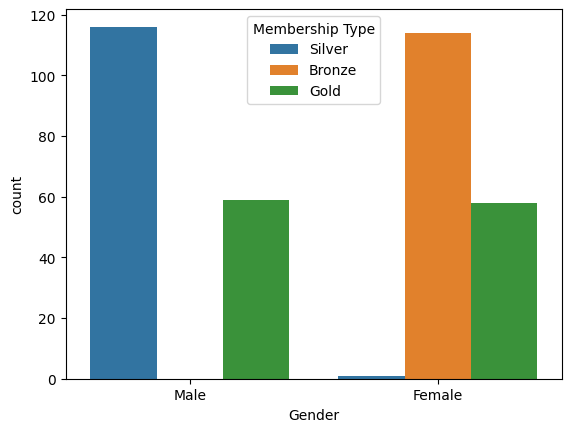

In [29]:
sns.barplot(data=GenderWithMembershiptype, x='Gender', y= 'count',hue = 'Membership Type')
plt.show()

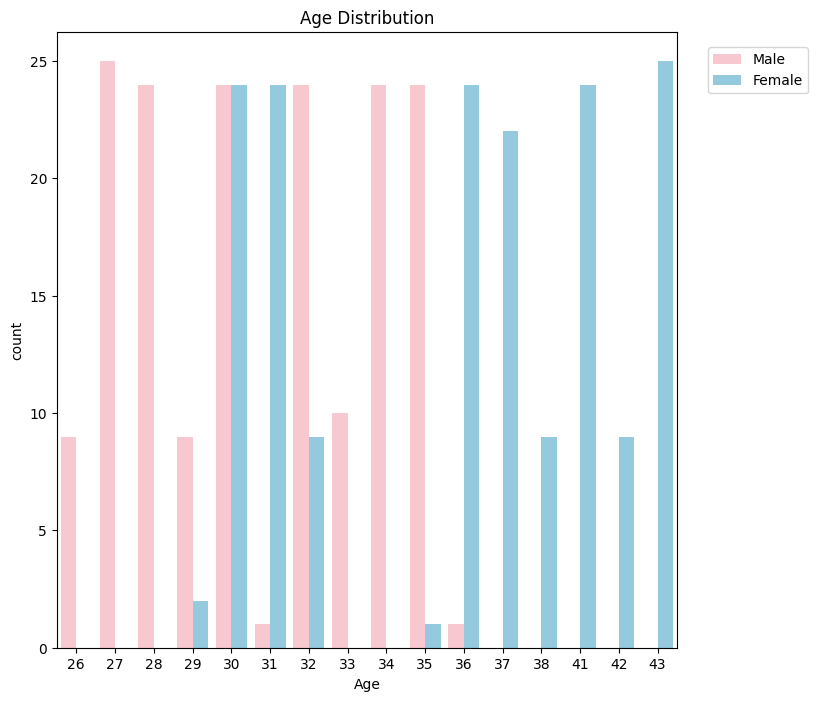

In [30]:
# Visualizing he distribution of age and gender within the dataset by creating a bar plot
gender_age_data = df[['Gender', 'Age']].value_counts().reset_index().sort_values(ascending=False, by='count')

plt.figure(figsize=(8,8))
sns.barplot(data=gender_age_data, x= 'Age', y= 'count',hue= 'Gender',palette= ['pink', 'skyblue'])
plt.title('Age Distribution')
plt.legend(loc=(1.05,0.9))
plt.show()

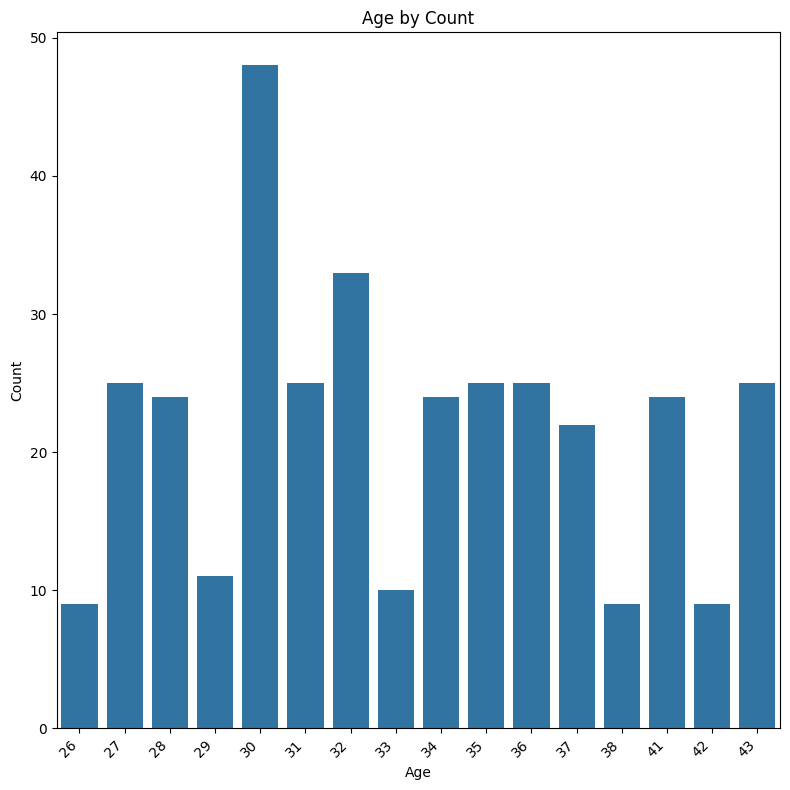

In [33]:
# Visualizing number of each age
age_data = df["Age"].value_counts().reset_index()
plt.figure(figsize=(8,8))
sns.barplot(data=age_data, x= "Age", y="count")
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45,ha='right')  #Rotate the labels for better readability
plt.title('Age by Count')
plt.tight_layout() #Adjust layout to prevent clipping of labels
plt.show()

In [34]:
city = df["City"]
city

0           New York
1        Los Angeles
2            Chicago
3      San Francisco
4              Miami
           ...      
345            Miami
346          Houston
347         New York
348      Los Angeles
349          Chicago
Name: City, Length: 348, dtype: object

In [35]:
# Encoding categorical columns
from sklearn.preprocessing import LabelEncoder

In [ ]:
# Encode 'Gender','Membership' and 'Satisfaction level'
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Membership Type']= encoder.fit_transform(df[Membership Type'])
df['Satisfaction Level'] = encoder.fit_transform(df['Satisfaction Level'])
df['City'] = encoder.fit_transform(df['City'])  # Encoding city if relevant
                                             

In [36]:
# Veryfying chabges
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


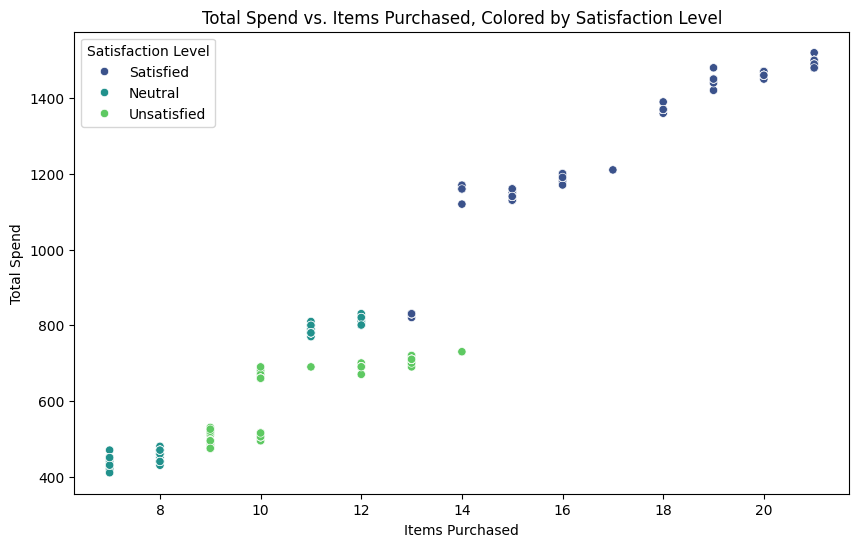

In [38]:
### Visualizing data in customer behavior to inform enegagement strategies.
# Total spend vs items purchased
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Items Purchased', y='Total Spend', hue='Satisfaction Level', palette='viridis')
plt.title('Total Spend vs. Items Purchased, Colored by Satisfaction Level')
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_60\3180437749.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Satisfaction Level', y='Days Since Last Purchase', palette='Set2')


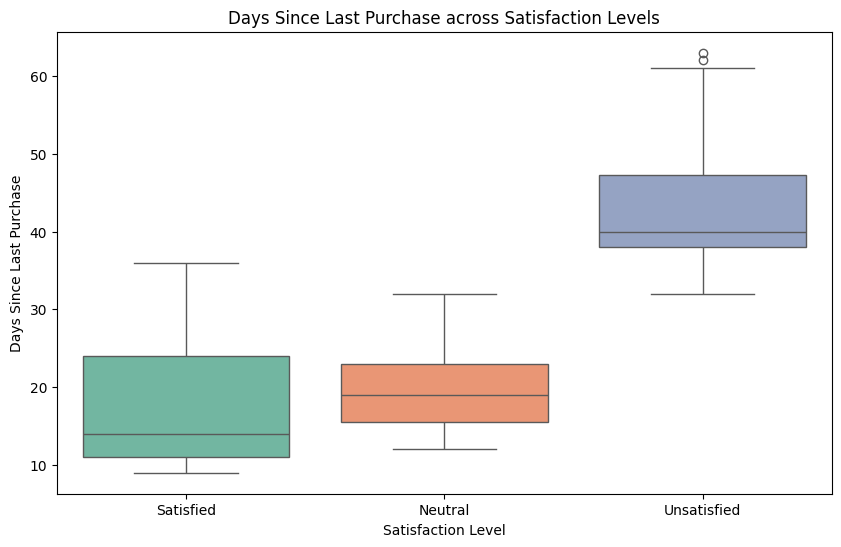

In [41]:
# Days since Last Purchase vs> Satisfaction Level
df.columns = df.columns.str.strip()  # Removes leading/trailing spaces

# Days Since Last Purchase vs. Satisfaction Level
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Satisfaction Level', y='Days Since Last Purchase', palette='Set2')
plt.title('Days Since Last Purchase across Satisfaction Levels')
plt.show()


In [45]:
from sklearn.model_selection import train_test_split

# Defining features and target variable
X = df.drop(columns=['Satisfaction Level'])  # Features
y = df['Satisfaction Level']                 # Target variable

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
